In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error, root_mean_squared_error
import matplotlib.pylab as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

import tensorflow as tf
from keras._tf_keras.keras.models import Model
from keras._tf_keras.keras.layers import Dense, Input, Dropout, LSTM
from keras._tf_keras.keras.regularizers import l2

np.random.seed(123)
tf.random.set_seed(123)

In [4]:
df0 = pd.read_csv('ETH-USD.csv', index_col=0, parse_dates=True)

In [5]:
df = df0[['Close']].copy()

In [6]:
df['LogClose'] = np.log(df['Close'])

In [7]:
df['DiffLogClose'] = df['LogClose'].diff()

In [8]:
def build_lstm_model(activation, units=50, dropout_rate=0.2, regularization_rate=0.01, optimizer='adam'):
    i = Input(shape=(T,1)) 
    x = LSTM(units, activation=activation, kernel_regularizer=l2(regularization_rate), 
    return_sequences=True)(i) 
    x = Dropout(dropout_rate)(x)  
    x = LSTM(units, activation=activation, kernel_regularizer=l2(regularization_rate), return_sequences=False)(x) 
    x = Dropout(dropout_rate)(x) 
    x = Dense(1)(x)  
    model = Model(inputs=i, outputs=x)
    model.compile(loss='mape', optimizer=optimizer) 
    return model

In [9]:
param_grid = {
    'model__units': [32, 64],  
    'model__activation': ['relu', 'tanh'],  
    'model__optimizer': ['adam', 'rmsprop'],  
    'model__dropout_rate': [0.1, 0.2], 
    'model__regularization_rate': [0.01, 0.001], 
    'epochs': [50, 100],
}

1 . time going trough
Fitting 2 folds for each of 64 candidates, totalling 128 fits
Epoch 1/100
10/10 - 5s - 483ms/step - loss: 148.6665 - val_loss: 93.0826
Epoch 2/100
10/10 - 0s - 16ms/step - loss: 121.2775 - val_loss: 103.7421
Epoch 3/100
10/10 - 0s - 13ms/step - loss: 118.2976 - val_loss: 94.9795
Epoch 4/100
10/10 - 0s - 13ms/step - loss: 123.4354 - val_loss: 102.9966
Epoch 5/100
10/10 - 0s - 12ms/step - loss: 120.7775 - val_loss: 94.7416
Epoch 6/100
10/10 - 0s - 11ms/step - loss: 120.0337 - val_loss: 103.7299
Epoch 7/100
10/10 - 0s - 11ms/step - loss: 111.2129 - val_loss: 96.1189
Epoch 8/100
10/10 - 0s - 11ms/step - loss: 109.5840 - val_loss: 104.0285
Epoch 9/100
10/10 - 0s - 11ms/step - loss: 111.9722 - val_loss: 96.1283
Epoch 10/100
10/10 - 0s - 11ms/step - loss: 112.9893 - val_loss: 104.7925
Epoch 11/100
10/10 - 0s - 11ms/step - loss: 118.2869 - val_loss: 97.0689
Epoch 12/100
10/10 - 0s - 11ms/step - loss: 104.9054 - val_loss: 105.0500
Epoch 13/100
10/10 - 0s - 11ms/step - loss

C:\Users\Korisnik\Desktop\Diplomski\Eth_price_prediciton\.venv\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/50
41/41 - 3s - 73ms/step - loss: 117.7886 - val_loss: 101.4035
Epoch 2/50
41/41 - 0s - 8ms/step - loss: 116.2872 - val_loss: 99.4017
Epoch 3/50
41/41 - 0s - 8ms/step - loss: 120.9059 - val_loss: 98.9439
Epoch 4/50
41/41 - 0s - 8ms/step - loss: 118.3681 - val_loss: 100.4549
Epoch 5/50
41/41 - 0s - 7ms/step - loss: 109.8904 - val_loss: 99.8736
Epoch 6/50
41/41 - 0s - 8ms/step - loss: 118.3086 - val_loss: 99.4064
Epoch 7/50
41/41 - 0s - 8ms/step - loss: 109.2980 - val_loss: 100.3890
Epoch 8/50
41/41 - 0s - 8ms/step - loss: 118.8483 - val_loss: 101.0377
Epoch 9/50
41/41 - 0s - 7ms/step - loss: 112.7185 - val_loss: 99.9925
Epoch 10/50
41/41 - 0s - 7ms/step - loss: 114.9292 - val_loss: 101.0429
Epoch 11/50
41/41 - 0s - 7ms/step - loss: 115.9014 - val_loss: 99.7707
Epoch 12/50
41/41 - 0s - 7ms/step - loss: 103.2821 - val_loss: 99.6282
Epoch 13/50
41/41 - 0s - 7ms/step - loss: 107.6838 - val_loss: 101.0246
Epoch 14/50
41/41 - 0s - 8ms/step - loss: 106.6062 - val_loss: 100.3919
Epoch 1

C:\Users\Korisnik\Desktop\Diplomski\Eth_price_prediciton\.venv\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/100
57/57 - 3s - 55ms/step - loss: 107.0959 - val_loss: 100.0233
Epoch 2/100
57/57 - 0s - 7ms/step - loss: 104.9398 - val_loss: 92.8890
Epoch 3/100
57/57 - 0s - 7ms/step - loss: 104.2136 - val_loss: 100.1515
Epoch 4/100
57/57 - 0s - 7ms/step - loss: 103.6404 - val_loss: 99.5712
Epoch 5/100
57/57 - 0s - 7ms/step - loss: 103.0499 - val_loss: 101.1818
Epoch 6/100
57/57 - 0s - 7ms/step - loss: 103.4452 - val_loss: 98.2898
Epoch 7/100
57/57 - 0s - 7ms/step - loss: 101.9165 - val_loss: 96.2764
Epoch 8/100
57/57 - 0s - 7ms/step - loss: 102.5932 - val_loss: 98.4630
Epoch 9/100
57/57 - 0s - 7ms/step - loss: 103.4365 - val_loss: 102.5628
Epoch 10/100
57/57 - 0s - 8ms/step - loss: 102.6857 - val_loss: 97.5638
Epoch 11/100
57/57 - 0s - 7ms/step - loss: 102.7140 - val_loss: 100.9893
Epoch 12/100
57/57 - 0s - 7ms/step - loss: 102.3317 - val_loss: 99.9789
Epoch 13/100
57/57 - 0s - 8ms/step - loss: 102.5236 - val_loss: 96.9749
Epoch 14/100
57/57 - 0s - 8ms/step - loss: 101.7477 - val_loss: 99.

C:\Users\Korisnik\Desktop\Diplomski\Eth_price_prediciton\.venv\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

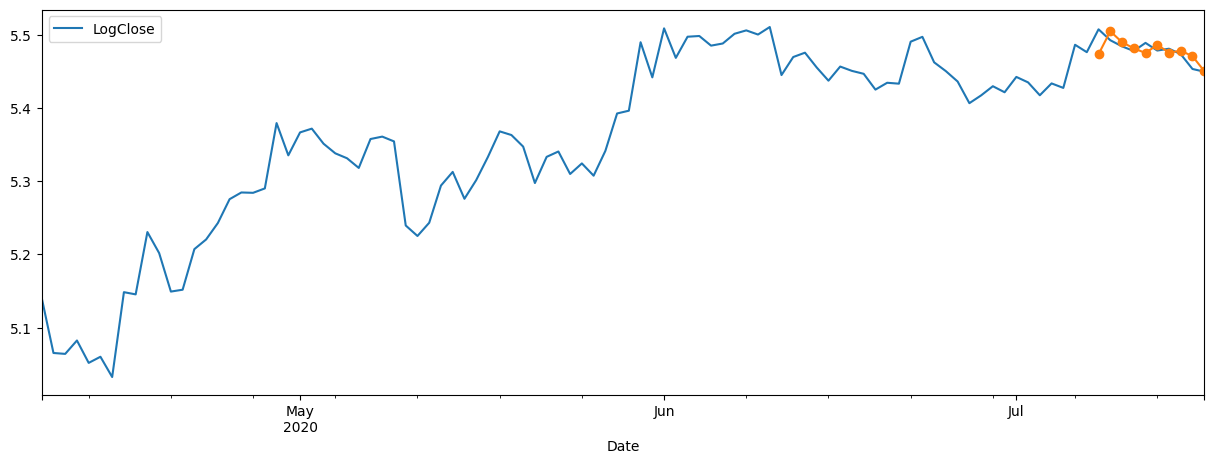

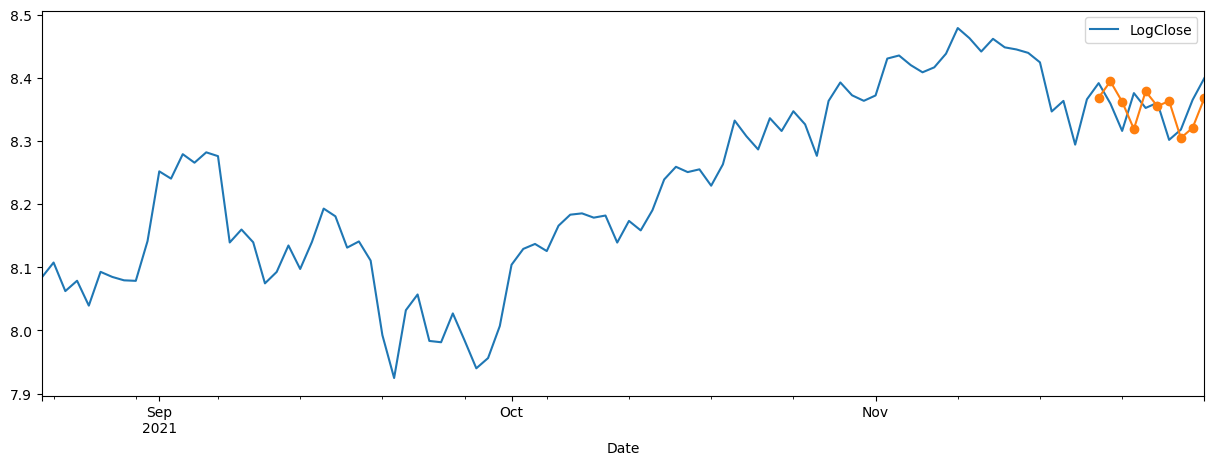

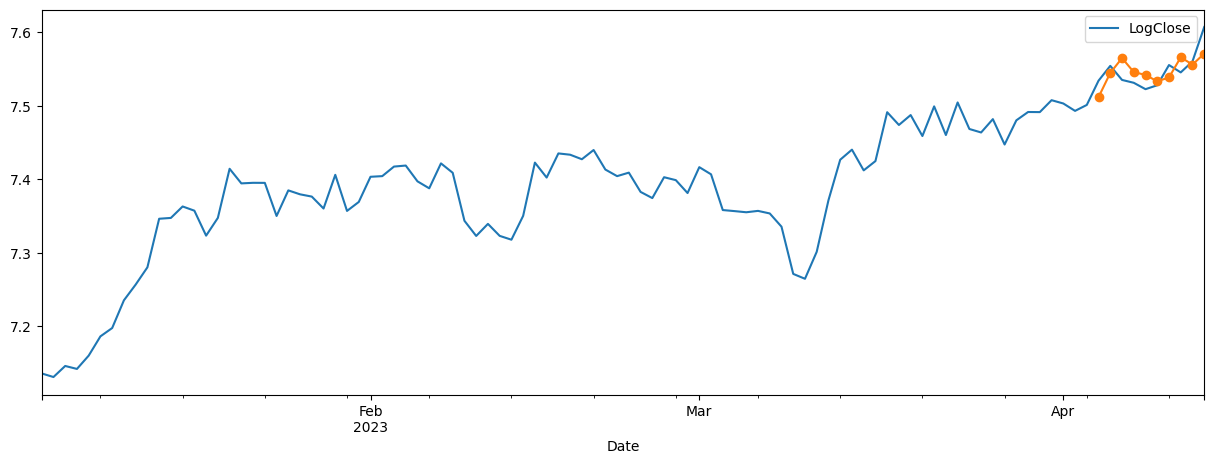

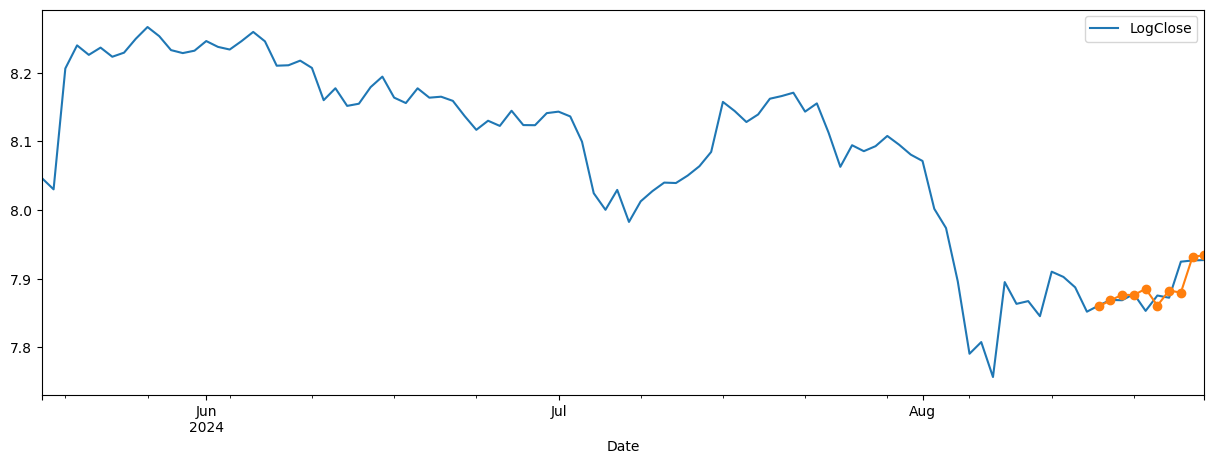

In [13]:
i = 0
c = 328
predicted_10d = []
real_10d = []
while i <= 4:
    i = i + 1
    print(i, ". time going trough")
    temp = df[:c].copy()
    c = c + 500
    
    Ntest = 10
    train = temp.iloc[:-Ntest]
    test = temp.iloc[-Ntest:]
    
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train[['DiffLogClose']])
    test_scaled = scaler.fit_transform(test[['DiffLogClose']])
    
    train_idx = temp.index <= train.index[-1]
    test_idx = temp.index > train.index[-1]
    
    temp.loc[train_idx, 'ScaledLogReturn'] = train_scaled.flatten()
    temp.loc[test_idx, 'ScaledLogReturn'] = test_scaled.flatten()
    
    series = temp['ScaledLogReturn'].dropna().to_numpy()

    T = 10
    X = []
    Y = []
    for t in range(len(series) - T):
        x = series[t:t + T]
        X.append(x)
        y = series[t + T]
        Y.append(y)
    X = np.array(X).reshape(-1,T,1)
    Y = np.array(Y)
    
    Xtrain, Ytrain = X[:-Ntest], Y[:-Ntest]
    Xtest, Ytest = X[-Ntest:], Y[-Ntest:]
    
    model = KerasRegressor(model=build_lstm_model, verbose=2)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=2, verbose=2)
    grid_result = grid.fit(Xtrain, Ytrain,validation_data=(Xtest, Ytest))
    best_model = grid_result.best_estimator_

    train_idx[:T + 1] = False
    
    Ptest = best_model.predict(Xtest)
    
    indices = np.arange(len(Ptest))
    Ptest = np.column_stack(Ptest)
    Ptest = Ptest.reshape(-1,1)
    
    Ptest = scaler.inverse_transform(Ptest).flatten()
    
    temp.loc[test_idx, 'Diff ANN Test Prediction'] = Ptest
    
    temp['ShiftLogClose'] = temp['LogClose'].shift(1)
    prev = temp['ShiftLogClose']
    
    last_train = train.iloc[-1]['LogClose']
    
    temp.loc[test_idx, '1step_test'] = prev[test_idx] + Ptest
    
    temp.iloc[-100:][['LogClose']].plot(figsize=(15, 5))
    plt.plot(temp.loc[test_idx, '1step_test'], marker='o')
    
    predicted_temp = np.array(np.exp(temp.loc[test_idx,'1step_test']))
    real_temp = np.array(temp.loc[test_idx,'Close'])
    predicted_10d.append(predicted_temp)
    real_10d.append(real_temp)

In [24]:
print(predicted_10d)
print('######')
print(real_10d)

[array([238.41282141, 246.00658249, 242.36197305, 240.33466739,
       238.80610453, 241.47263514, 238.95075462, 239.55264594,
       237.76725513, 232.9917421 ]), array([4310.13174157, 4422.06565907, 4281.99783046, 4100.60110552,
       4352.79166621, 4252.07660309, 4286.80638747, 4043.10303914,
       4108.58809813, 4306.40582005]), array([1829.59030214, 1890.85599976, 1929.40220456, 1893.03412293,
       1885.67154833, 1869.35923703, 1879.23631386, 1931.43560614,
       1912.41299023, 1941.13060512]), array([2589.78922866, 2612.75563642, 2634.38992425, 2633.24980377,
       2657.30076112, 2593.14477026, 2650.55457155, 2642.53322375,
       2785.00943732, 2789.50170984])]
######
[array([246.670013, 243.015961, 240.984985, 239.458176, 242.131699,
       239.604584, 240.211487, 238.423523, 233.640884, 232.773087]), array([4409.931152, 4269.73291 , 4088.457764, 4340.763672, 4239.981445,
       4274.743164, 4030.908936, 4096.912109, 4294.453613, 4445.10498 ]), array([1871.005127, 1909.11

1 . time going trough
Fitting 2 folds for each of 64 candidates, totalling 128 fits
Epoch 1/50
9/9 - 9s - 1s/step - loss: 106.7775 - val_loss: 98.9493
Epoch 2/50
9/9 - 0s - 46ms/step - loss: 127.0803 - val_loss: 96.1193
Epoch 3/50
9/9 - 0s - 47ms/step - loss: 138.8652 - val_loss: 96.3688
Epoch 4/50
9/9 - 0s - 47ms/step - loss: 124.6105 - val_loss: 99.1998
Epoch 5/50
9/9 - 0s - 46ms/step - loss: 106.9651 - val_loss: 100.0135
Epoch 6/50
9/9 - 0s - 48ms/step - loss: 115.6027 - val_loss: 99.4910
Epoch 7/50
9/9 - 0s - 46ms/step - loss: 114.5870 - val_loss: 99.0666
Epoch 8/50
9/9 - 1s - 65ms/step - loss: 105.8326 - val_loss: 100.5830
Epoch 9/50
9/9 - 0s - 44ms/step - loss: 113.5963 - val_loss: 100.2542
Epoch 10/50
9/9 - 0s - 43ms/step - loss: 101.2283 - val_loss: 98.9820
Epoch 11/50
9/9 - 0s - 44ms/step - loss: 128.3976 - val_loss: 97.4956
Epoch 12/50
9/9 - 0s - 42ms/step - loss: 109.2258 - val_loss: 98.9294
Epoch 13/50
9/9 - 0s - 41ms/step - loss: 110.8786 - val_loss: 99.8348
Epoch 14/50
9/

C:\Users\Korisnik\Desktop\Diplomski\Eth_price_prediciton\.venv\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

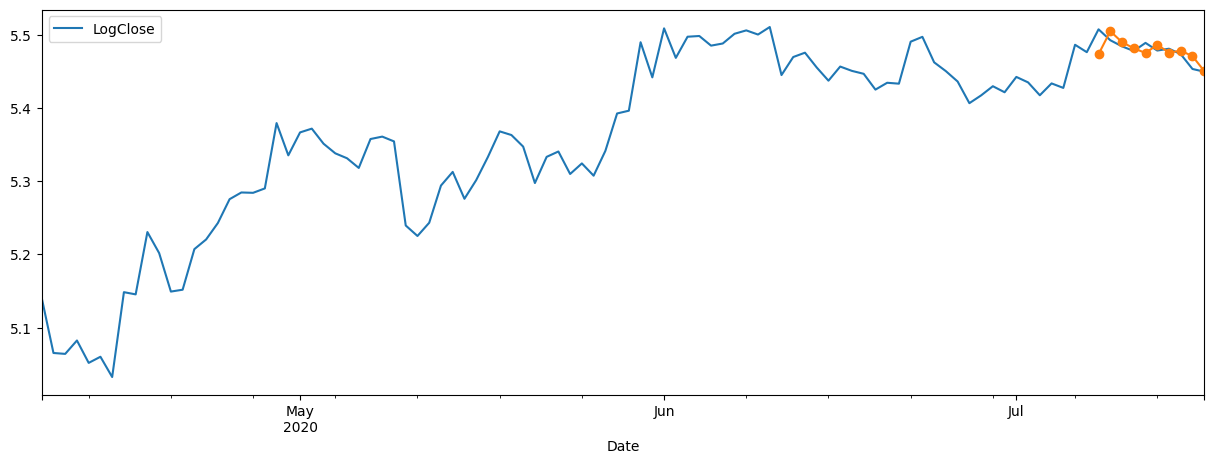

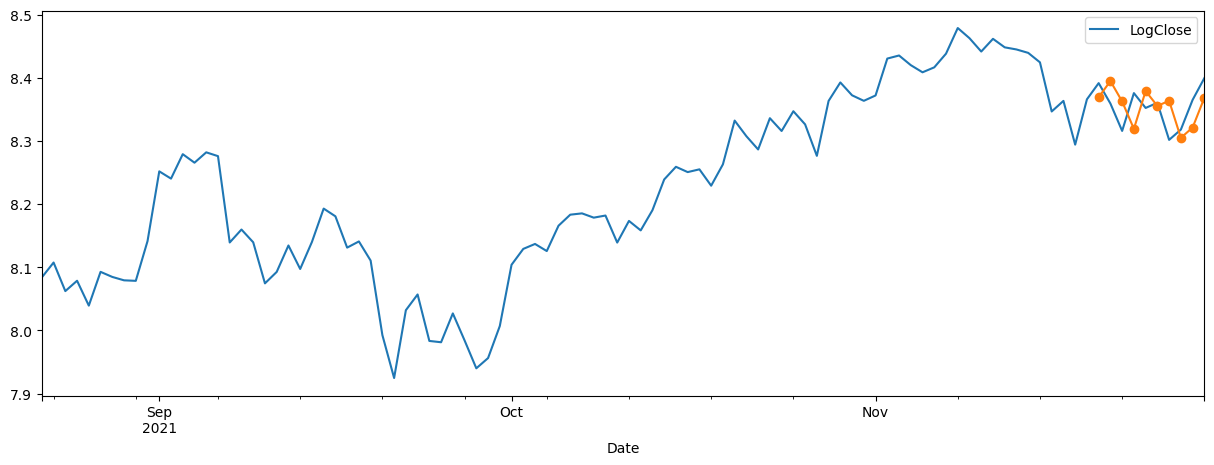

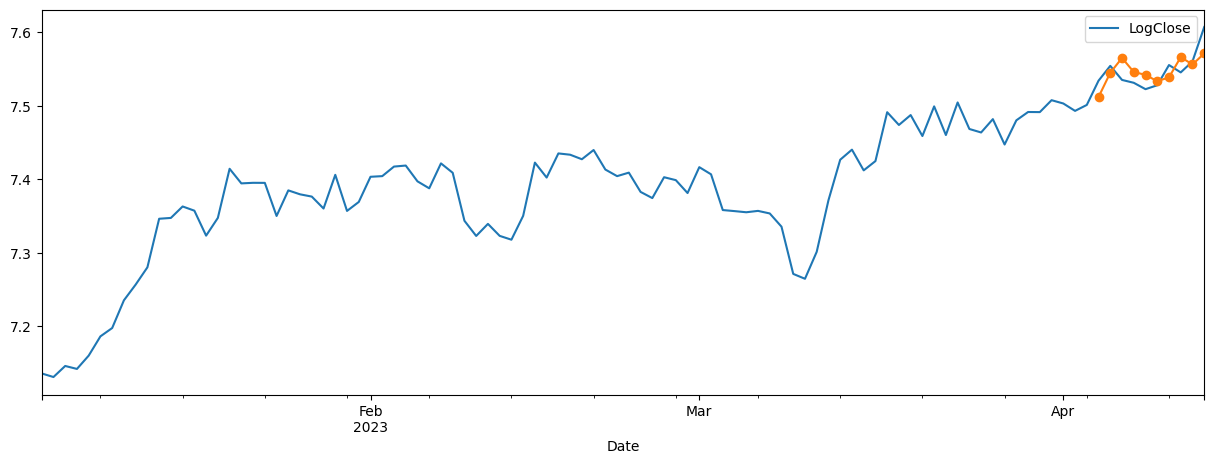

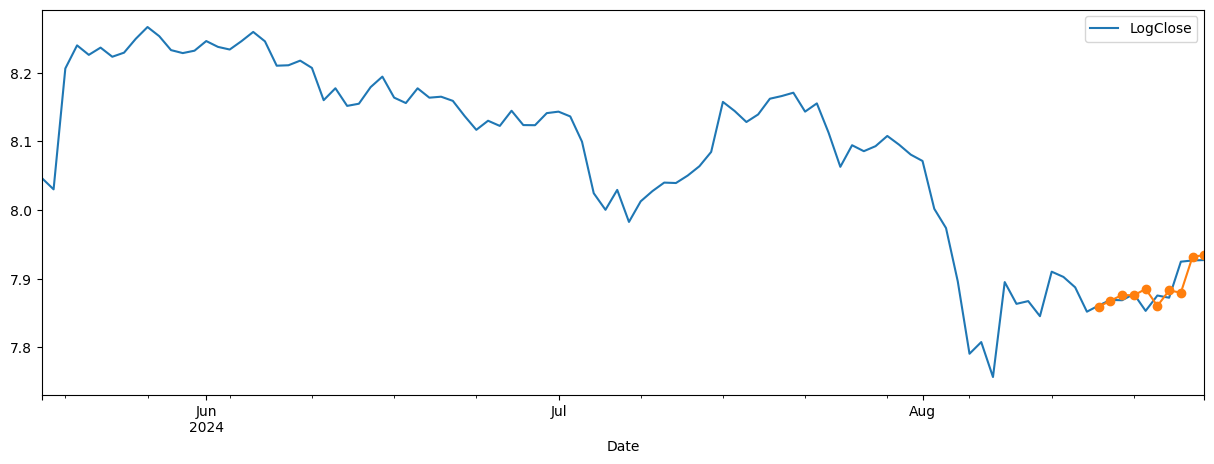

In [33]:
i = 0
c = 328
predicted_50d = []
real_50d = []
while i < 4:
    i = i + 1
    print(i, ". time going trough")
    temp = df[:c].copy()
    c = c + 500
    
    Ntest = 10
    train = temp.iloc[:-Ntest]
    test = temp.iloc[-Ntest:]
    
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train[['DiffLogClose']])
    test_scaled = scaler.fit_transform(test[['DiffLogClose']])
    
    train_idx = temp.index <= train.index[-1]
    test_idx = temp.index > train.index[-1]
    
    temp.loc[train_idx, 'ScaledLogReturn'] = train_scaled.flatten()
    temp.loc[test_idx, 'ScaledLogReturn'] = test_scaled.flatten()
    
    series = temp['ScaledLogReturn'].dropna().to_numpy()

    T = 50
    X = []
    Y = []
    for t in range(len(series) - T):
        x = series[t:t + T]
        X.append(x)
        y = series[t + T]
        Y.append(y)
    X = np.array(X).reshape(-1,T,1)
    Y = np.array(Y)
    
    Xtrain, Ytrain = X[:-Ntest], Y[:-Ntest]
    Xtest, Ytest = X[-Ntest:], Y[-Ntest:]
    
    model = KerasRegressor(model=build_lstm_model, verbose=2)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=2, verbose=2)
    grid_result = grid.fit(Xtrain, Ytrain,validation_data=(Xtest, Ytest))
    best_model = grid_result.best_estimator_

    train_idx[:T + 1] = False
    
    Ptest = best_model.predict(Xtest)
    
    indices = np.arange(len(Ptest))
    Ptest = np.column_stack(Ptest)
    Ptest = Ptest.reshape(-1,1)
    
    Ptest = scaler.inverse_transform(Ptest).flatten()
    
    temp.loc[test_idx, 'Diff ANN Test Prediction'] = Ptest
    
    temp['ShiftLogClose'] = temp['LogClose'].shift(1)
    prev = temp['ShiftLogClose']
    
    last_train = train.iloc[-1]['LogClose']
    
    temp.loc[test_idx, '1step_test'] = prev[test_idx] + Ptest
    
    temp.iloc[-100:][['LogClose']].plot(figsize=(15, 5))
    plt.plot(temp.loc[test_idx, '1step_test'], marker='o')
    
    predicted_temp = np.array(np.exp(temp.loc[test_idx,'1step_test']))
    real_temp = np.array(temp.loc[test_idx,'Close'])
    predicted_50d.append(predicted_temp)
    real_50d.append(real_temp)
    print(predicted_50d)
    print(real_50d)

1 . time going trough
Fitting 2 folds for each of 64 candidates, totalling 128 fits
Epoch 1/50
7/7 - 4s - 592ms/step - loss: 161.4342 - val_loss: 93.7382
Epoch 2/50
7/7 - 0s - 45ms/step - loss: 114.0330 - val_loss: 103.8302
Epoch 3/50
7/7 - 0s - 45ms/step - loss: 165.2146 - val_loss: 107.3174
Epoch 4/50
7/7 - 0s - 45ms/step - loss: 138.8051 - val_loss: 102.4406
Epoch 5/50
7/7 - 0s - 45ms/step - loss: 104.9961 - val_loss: 97.8400
Epoch 6/50
7/7 - 0s - 45ms/step - loss: 110.4700 - val_loss: 97.4171
Epoch 7/50
7/7 - 0s - 47ms/step - loss: 120.3242 - val_loss: 98.0162
Epoch 8/50
7/7 - 0s - 45ms/step - loss: 101.9539 - val_loss: 101.4926
Epoch 9/50
7/7 - 0s - 47ms/step - loss: 117.6168 - val_loss: 103.8872
Epoch 10/50
7/7 - 0s - 47ms/step - loss: 133.6202 - val_loss: 102.0120
Epoch 11/50
7/7 - 0s - 45ms/step - loss: 116.4499 - val_loss: 101.0944
Epoch 12/50
7/7 - 0s - 47ms/step - loss: 118.7219 - val_loss: 100.6581
Epoch 13/50
7/7 - 0s - 45ms/step - loss: 112.5481 - val_loss: 97.2583
Epoch 

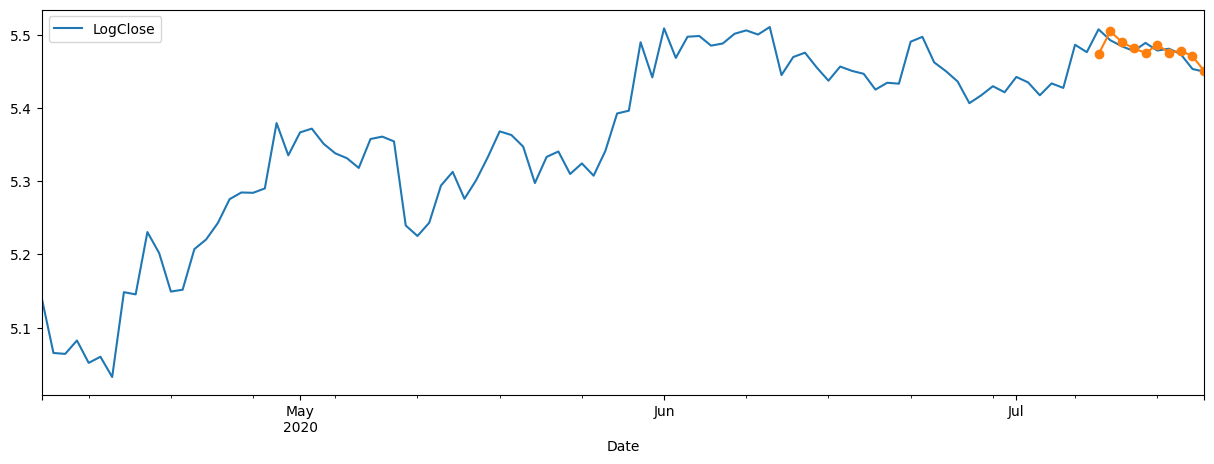

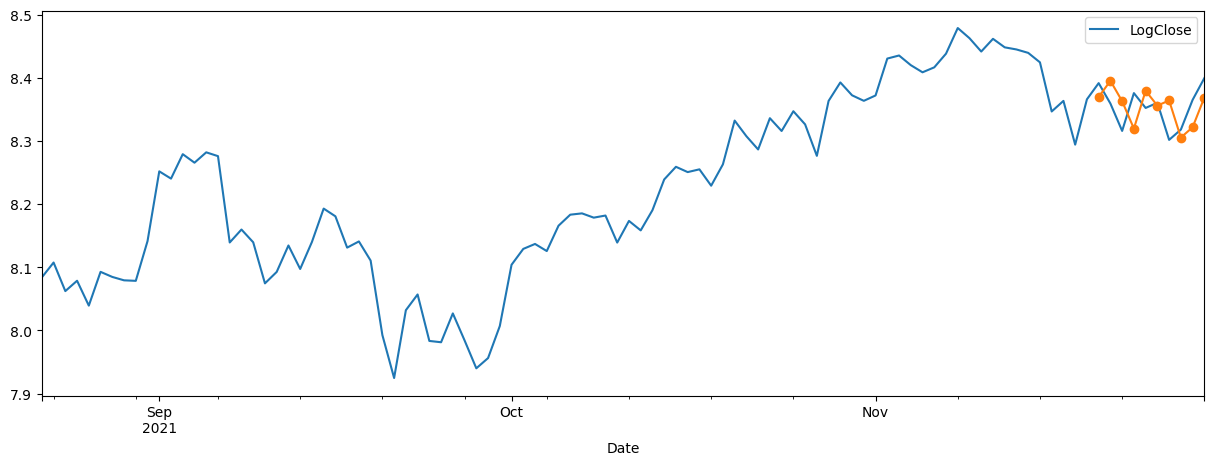

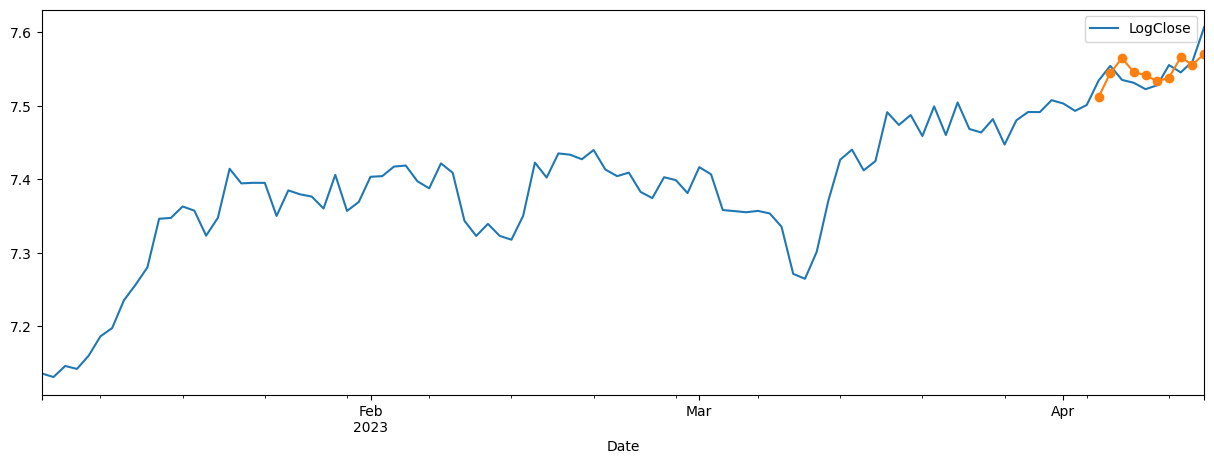

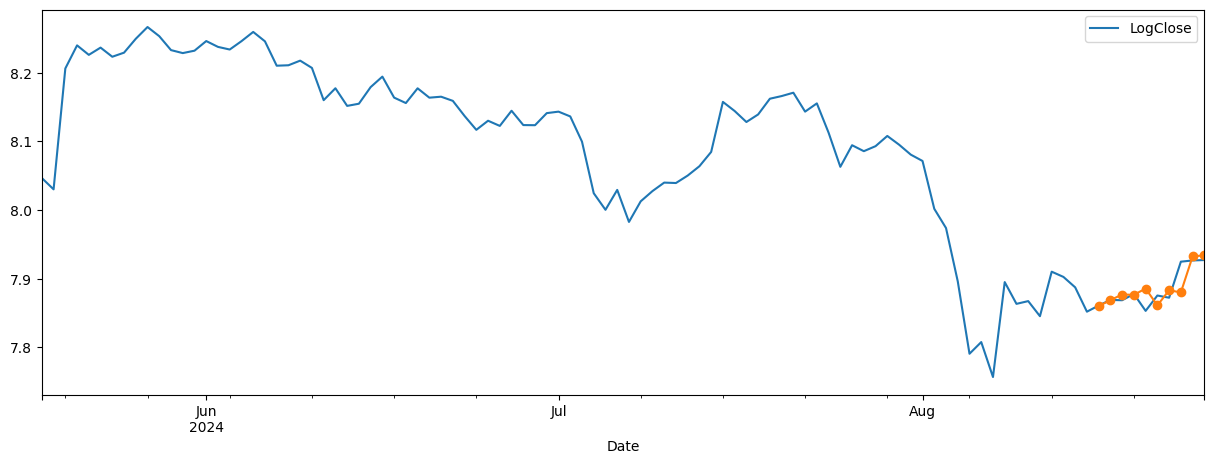

In [10]:
i = 0
c = 328
predicted_100d = []
real_100d = []
while i < 4:
    i = i + 1
    print(i, ". time going trough")
    temp = df[:c].copy()
    c = c + 500
    
    Ntest = 10
    train = temp.iloc[:-Ntest]
    test = temp.iloc[-Ntest:]
    
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train[['DiffLogClose']])
    test_scaled = scaler.fit_transform(test[['DiffLogClose']])
    
    train_idx = temp.index <= train.index[-1]
    test_idx = temp.index > train.index[-1]
    
    temp.loc[train_idx, 'ScaledLogReturn'] = train_scaled.flatten()
    temp.loc[test_idx, 'ScaledLogReturn'] = test_scaled.flatten()
    
    series = temp['ScaledLogReturn'].dropna().to_numpy()

    T = 100
    X = []
    Y = []
    for t in range(len(series) - T):
        x = series[t:t + T]
        X.append(x)
        y = series[t + T]
        Y.append(y)
    X = np.array(X).reshape(-1,T,1)
    Y = np.array(Y)
    
    Xtrain, Ytrain = X[:-Ntest], Y[:-Ntest]
    Xtest, Ytest = X[-Ntest:], Y[-Ntest:]
    
    model = KerasRegressor(model=build_lstm_model, verbose=2)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=2, verbose=2)
    grid_result = grid.fit(Xtrain, Ytrain,validation_data=(Xtest, Ytest))
    best_model = grid_result.best_estimator_

    train_idx[:T + 1] = False
    
    Ptest = best_model.predict(Xtest)
    
    indices = np.arange(len(Ptest))
    Ptest = np.column_stack(Ptest)
    Ptest = Ptest.reshape(-1,1)
    
    Ptest = scaler.inverse_transform(Ptest).flatten()
    
    temp.loc[test_idx, 'Diff ANN Test Prediction'] = Ptest
    
    temp['ShiftLogClose'] = temp['LogClose'].shift(1)
    prev = temp['ShiftLogClose']
    
    last_train = train.iloc[-1]['LogClose']
    
    temp.loc[test_idx, '1step_test'] = prev[test_idx] + Ptest
    
    temp.iloc[-100:][['LogClose']].plot(figsize=(15, 5))
    plt.plot(temp.loc[test_idx, '1step_test'], marker='o')
    
    predicted_temp = np.array(np.exp(temp.loc[test_idx,'1step_test']))
    real_temp = np.array(temp.loc[test_idx,'Close'])
    predicted_100d.append(predicted_temp)
    real_100d.append(real_temp)
    print(predicted_100d)
    print("##########")
    print(real_100d)

In [13]:
predicted_50d = predicted_100d
real_50d = real_100d
predicted_10d = predicted_100d
real_10d = real_100d

In [14]:
print("R2 score for 10, 50 and 100 days are:",round(r2_score(real_10d, predicted_10d),4), round(r2_score(real_50d, predicted_50d),4),round(r2_score(real_100d, predicted_100d),4))

R2 score for 10, 50 and 100 days are: 0.9963 0.9963 0.9963


In [15]:
print("MAPE score for 10, 50 and 100 days are:",round(mean_absolute_percentage_error(real_10d, predicted_10d)*100,2),round(mean_absolute_percentage_error(real_50d, predicted_50d)*100,2),round(mean_absolute_percentage_error(real_100d, predicted_100d)*100,2))

MAPE score for 10, 50 and 100 days are: 1.88 1.88 1.88


In [16]:
print("MAE scores for 10, 50 and 100 days are:",round(mean_absolute_error(real_10d, predicted_10d),2),round(mean_absolute_error(real_50d, predicted_50d),2),round(mean_absolute_error(real_100d, predicted_100d),2))

MAE scores for 10, 50 and 100 days are: 53.8 53.8 53.8


In [17]:
print("MSE scores for 10, 50 and 100 days are:",round(mean_squared_error(real_10d, predicted_10d),2),round(mean_squared_error(real_50d, predicted_50d),2),round(mean_squared_error(real_100d, predicted_100d),2))

MSE scores for 10, 50 and 100 days are: 7614.35 7614.35 7614.35


In [18]:
print("RMSE scores for 10, 50 and 100 days are:",round(root_mean_squared_error(real_10d, predicted_10d),2),round(root_mean_squared_error(real_50d, predicted_50d),2),round(root_mean_squared_error(real_100d, predicted_100d),2))

RMSE scores for 10, 50 and 100 days are: 81.83 81.83 81.83
